In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from AdamANN import AdamANN_clf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

# Prepare the data

In [2]:
# load MNIST
path = '../MNIST/Data/'

mnist = pd.read_csv(path+'train.csv')

In [3]:
X = mnist.drop('label', axis=1)
y = mnist.label

In [4]:
# normalize the data
normalizer = StandardScaler()
X = normalizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2, random_state=42)

Cost function after epoch 0 : 0.3563933550254774
Cost function after epoch 20 : 0.3752126450935057
Cost function after epoch 40 : 0.40064908560143175
Cost function after epoch 60 : 0.3470973092075446
Cost function after epoch 80 : 0.3366294241188653
Cost function after epoch 100 : 0.3173977254594664
Cost function after epoch 120 : 0.2922410583172145
Cost function after epoch 140 : 0.2630427075547559
Cost function after epoch 160 : 0.2525359412308037
Cost function after epoch 180 : 0.23608028754745497
Cost function after epoch 200 : 0.2251634043687259
Time : 26.086 s
train accuracy :  0.993541666667
test accuracy :  0.957619047619
             precision    recall  f1-score   support

          0       0.98      0.97      0.98       816
          1       0.97      0.98      0.97       909
          2       0.95      0.94      0.95       846
          3       0.96      0.94      0.95       937
          4       0.96      0.95      0.95       839
          5       0.94      0.96      0.95 

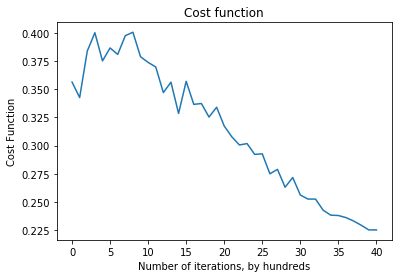

In [5]:
# set hyperparameters
hidden_units = [20]
hidden_func = 'relu'
output_func = 'softmax'
alpha = 0.1
epoch = 200
learning_rate = 0.01
learn_decay = 0.0001
batch_size=256

AdamNN = AdamANN_clf(hidden_units, hidden_func, output_func, 
                     alpha, epoch, learning_rate, learn_decay, batch_size)

AdamNN.fit(X_train, y_train)

y_train_pred = AdamNN.predict(X_train)
y_test_pred = AdamNN.predict(X_test)

train_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test)

print('train accuracy : ', train_acc)
print('test accuracy : ', test_acc)

print(classification_report(y_test, y_test_pred))

Cost function after epoch 0 : 0.9233822163070654
Cost function after epoch 100 : 0.6600273771703057
Cost function after epoch 200 : 0.5718953272702767
Cost function after epoch 300 : 0.5485770170832616
Cost function after epoch 400 : 0.5458109917958418
Cost function after epoch 500 : 0.5457140933164412
Cost function after epoch 600 : 0.5457131117731575
Cost function after epoch 700 : 0.5457131079135468
Cost function after epoch 800 : 0.5457131079061103
Cost function after epoch 900 : 0.5457131079061046
Cost function after epoch 1000 : 0.5457131079061046
Time : 219.095 s
train accuracy :  0.991011904762
test accuracy :  0.962738095238
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       816
          1       0.97      0.99      0.98       909
          2       0.97      0.95      0.96       846
          3       0.96      0.95      0.95       937
          4       0.97      0.96      0.96       839
          5       0.94      0.95      0

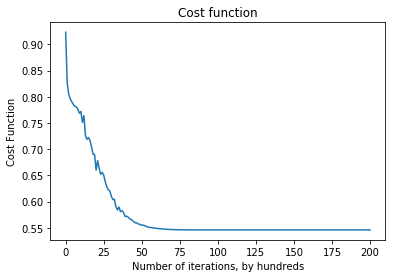

In [6]:
# set hyperparameters
hidden_units = [20,20,10]
hidden_func = 'relu'
output_func = 'softmax'
alpha = 0.5
epoch = 1000
learning_rate = 0.01
learn_decay = 0.0001
batch_size=256

AdamNN2 = AdamANN_clf(hidden_units, hidden_func, output_func, 
                     alpha, epoch, learning_rate, learn_decay, batch_size)

AdamNN2.fit(X_train, y_train)

y_train_pred = AdamNN2.predict(X_train)
y_test_pred = AdamNN2.predict(X_test)

train_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test)

print('train accuracy : ', train_acc)
print('test accuracy : ', test_acc)

print(classification_report(y_test, y_test_pred))

In [7]:
# trying pca to accelerate things a bit
from sklearn.decomposition import PCA

pca = PCA(0.99)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Cost function after epoch 0 : 0.5457941204250186
Cost function after epoch 30 : 0.5460283265973553
Cost function after epoch 60 : 0.4826520841915842
Cost function after epoch 90 : 0.44409486022611644
Cost function after epoch 120 : 0.3896533910140771
Cost function after epoch 150 : 0.3567712877068107
Cost function after epoch 180 : 0.3433005462216714
Cost function after epoch 210 : 0.315495663090132
Cost function after epoch 240 : 0.30638605364036525
Cost function after epoch 270 : 0.30211708352507766
Cost function after epoch 300 : 0.3000423544187809
Time : 40.611 s
train accuracy :  0.995833333333
test accuracy :  0.964761904762
             precision    recall  f1-score   support

          0       0.99      0.98      0.98       816
          1       0.98      0.99      0.98       909
          2       0.96      0.95      0.96       846
          3       0.95      0.94      0.95       937
          4       0.97      0.96      0.96       839
          5       0.93      0.96      0.95

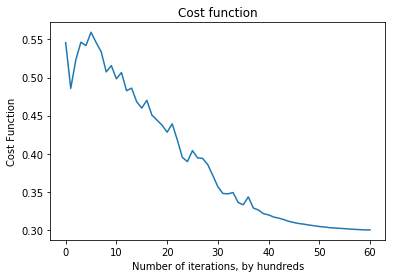

In [8]:
# set hyperparameters
hidden_units = [20,20]
hidden_func = 'relu'
output_func = 'softmax'
alpha = 0.2
epoch = 300
learning_rate = 0.01
learn_decay = 0.0001
batch_size=256

AdamNN3 = AdamANN_clf(hidden_units, hidden_func, output_func, 
                     alpha, epoch, learning_rate, learn_decay, batch_size, hot_start=True)

AdamNN3.fit(X_train_pca, y_train)

y_train_pred = AdamNN3.predict(X_train_pca)
y_test_pred = AdamNN3.predict(X_test_pca)

train_acc = accuracy_score(y_train_pred, y_train)
test_acc = accuracy_score(y_test_pred, y_test)

print('train accuracy : ', train_acc)
print('test accuracy : ', test_acc)

print(classification_report(y_test, y_test_pred))